In [132]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
import scipy
import pandas as pd
from scipy import stats

In [113]:
volume_cryptos = pd.read_pickle('./volume_cryptos.pkl').astype('float')
volume_cryptos.head()

,"(11, 1)","(11, 2)","(11, 3)","(11, 4)","(11, 5)","(11, 6)","(11, 7)","(11, 8)","(11, 9)","(11, 10)",...,"(2, 20)","(2, 21)","(2, 22)","(2, 23)","(2, 24)","(2, 25)","(2, 26)","(2, 27)","(2, 28)","(2, 29)"
0,8.970769,9.524479,27.707678,28.283129,54.985081,78.798522,24.081889,33.292067,63.043501,6.372818,...,240.040874,34.539296,16.809746,20.978678,146.763163,243.769456,346.124786,132.473442,163.898796,72.033705
1,43.627570,213.664920,61.867108,21.008396,21.479269,18.575431,77.730586,12.509399,72.715469,6.573682,...,186.461500,138.815418,82.343699,1.639561,132.843066,29.168301,201.188655,972.227974,239.794484,26.463248
2,11.672195,40.459803,33.227140,8.033916,10.453011,11.514917,203.406252,4.094531,2.226942,4.114936,...,421.362284,86.299644,78.237219,5.753139,549.868851,113.372080,177.432063,405.981517,63.756334,35.481598
3,31.100061,5.303673,21.107253,1.757448,168.711860,21.692121,13.902405,54.284584,1.269751,45.762592,...,435.134392,35.355837,55.940481,256.767743,204.553973,37.780307,121.498887,131.741199,44.975926,26.266563
4,7.156883,3.057171,79.534388,7.339546,24.517245,5.231176,13.127471,12.972374,88.437485,11.079248,...,138.427726,28.505487,4.950932,17.005909,176.264879,31.871188,158.495527,105.505854,56.495533,291.459263


In [114]:
volume_days = pd.read_pickle('./volume_days.pkl').astype('float')
volume_days.head()

,BCH-USD,BTC-USD,ETH-USD,LTC-USD
0,53.541251,22.105916,167.070157,241.190982
1,44.791504,14.479364,105.411995,177.136618
2,32.081269,12.074388,108.981933,166.336766
3,31.792895,13.034245,95.402043,127.053126
4,25.068367,9.509703,73.990824,110.164814


In [115]:
u, sigma, v_t = np.linalg.svd(volume_days, full_matrices=False, compute_uv=True)

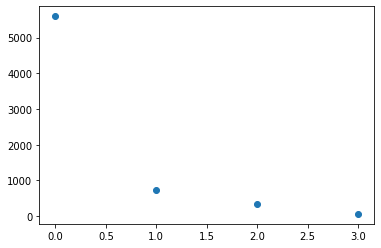

In [116]:
plt.scatter(range(4), sigma);

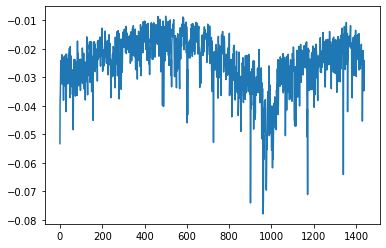

In [117]:
plt.plot(range(1440), u[:, 0]);

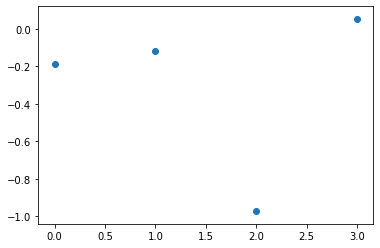

In [118]:
plt.scatter(range(4), v_t[:, 0]);

In [119]:
u, sigma, v_t = np.linalg.svd(volume_cryptos, full_matrices=False, compute_uv=True)

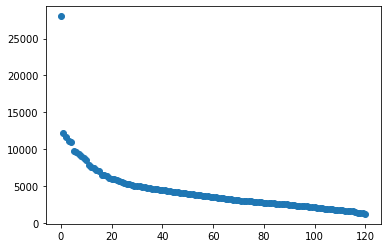

In [120]:
plt.scatter(range(121), sigma);

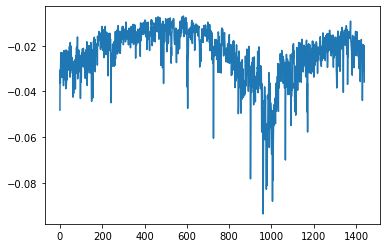

In [121]:
plt.plot(range(1440), u[:, 0]);

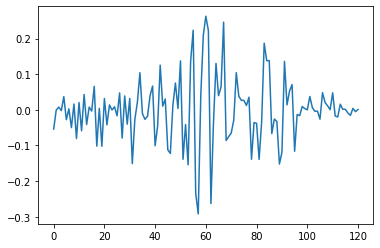

In [135]:
plt.plot(range(121), v_t[:, 0]);

In [163]:
signal = v_t[0, :]
v_1 = np.concatenate((signal[:66], signal[107:]))
v_2 = signal[66:107]

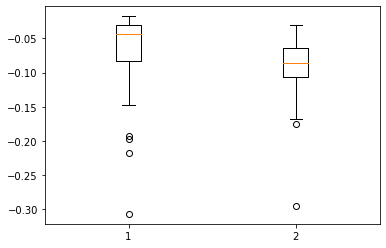

In [165]:
plt.boxplot((v_1, v_2));

In [167]:
stats.mannwhitneyu(v_1, v_2)

MannwhitneyuResult(statistic=893.0, pvalue=2.1761841462463578e-05)

In [158]:
data = np.matmul(u, np.diag(sigma))
data = np.matmul(data, v_t)
np.max(np.abs(data - volume_cryptos.as_matrix()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


2.9103830456733704e-11